In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import folium
from IPython.display import IFrame
import webbrowser

In [2]:
file_path =  r'C:\Users\Rik\Desktop\immo-eliza-team6-analysis\data\clean\houses_incl_outliers.csv'

df = pd.read_csv(file_path, sep = ',')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Rik\\Desktop\\immo-eliza-team6-analysis\\data\\clean\\houses_incl_outliers.csv'

In [3]:
df.head(30)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5663 entries, 0 to 5662
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5663 non-null   int64  
 1   locality_name       5663 non-null   object 
 2   Postal_code         5663 non-null   object 
 3   Price               5663 non-null   int64  
 4   Subtype             5663 non-null   object 
 5   Number_of_bedrooms  5663 non-null   int64  
 6   Living_area         5663 non-null   int64  
 7   street              5663 non-null   object 
 8   number              5646 non-null   object 
 9   latitude            5661 non-null   float64
 10  longitude           5661 non-null   float64
 11  Open_fire           5663 non-null   int64  
 12  Swimming_Pool       5663 non-null   int64  
 13  hasTerrace          5663 non-null   int64  
 14  terraceSurface      5663 non-null   int64  
 15  gardenSurface       5663 non-null   int64  
 16  Kitche

In [4]:
# transform 'int64' to 'Int64' to handle NaN

int_columns = df.select_dtypes(include=['int64'])

for col in int_columns.columns:
    df[col] = df[col].astype('Int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5663 entries, 0 to 5662
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5663 non-null   Int64  
 1   locality_name       5663 non-null   object 
 2   Postal_code         5663 non-null   object 
 3   Price               5663 non-null   Int64  
 4   Subtype             5663 non-null   object 
 5   Number_of_bedrooms  5663 non-null   Int64  
 6   Living_area         5663 non-null   Int64  
 7   street              5663 non-null   object 
 8   number              5646 non-null   object 
 9   latitude            5661 non-null   float64
 10  longitude           5661 non-null   float64
 11  Open_fire           5663 non-null   Int64  
 12  Swimming_Pool       5663 non-null   Int64  
 13  hasTerrace          5663 non-null   Int64  
 14  terraceSurface      5663 non-null   Int64  
 15  gardenSurface       5663 non-null   Int64  
 16  Kitche

In [5]:
# transform dtypes 'object' to 'category'
obj_columns = df.select_dtypes(include=['object'])

for col in obj_columns.columns:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5663 entries, 0 to 5662
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  5663 non-null   Int64   
 1   locality_name       5663 non-null   category
 2   Postal_code         5663 non-null   category
 3   Price               5663 non-null   Int64   
 4   Subtype             5663 non-null   category
 5   Number_of_bedrooms  5663 non-null   Int64   
 6   Living_area         5663 non-null   Int64   
 7   street              5663 non-null   category
 8   number              5646 non-null   category
 9   latitude            5661 non-null   float64 
 10  longitude           5661 non-null   float64 
 11  Open_fire           5663 non-null   Int64   
 12  Swimming_Pool       5663 non-null   Int64   
 13  hasTerrace          5663 non-null   Int64   
 14  terraceSurface      5663 non-null   Int64   
 15  gardenSurface       5663 non-null   In

In [6]:
#Getting an idea of the values in columns with dtype 'category'
pd.set_option('display.max_rows', 30)

for col in df.select_dtypes(include=['category']).columns:
    print(f"Counts for {col}:")
    print(df[col].value_counts())
    unique_count = df[col].nunique()
    print("\n")
    print(f"Number of unique entries in {col}: {unique_count}\n")

Counts for locality_name:
locality_name
Gent                          197
Antwerpen                     111
Aalst                          73
Ronse                          73
Brugge                         67
                             ... 
Antwerpen Ekeren                1
Antwerpen Wilrijk               1
Antwerpen-Noord                 1
Appels                          1
Welkenraedt Henri-Chapelle      1
Name: count, Length: 1119, dtype: int64


Number of unique entries in locality_name: 1119

Counts for Postal_code:
Postal_code
9000    158
8300     75
9600     73
9300     65
9500     65
       ... 
1982      1
3290      1
3294      1
3391      1
3401      1
Name: count, Length: 735, dtype: int64


Number of unique entries in Postal_code: 735

Counts for Subtype:
Subtype
House    5663
Name: count, dtype: int64


Number of unique entries in Subtype: 1

Counts for street:
street
Stationsstraat         37
Molenstraat            33
Kerkstraat             28
Veldstraat             18


**POSTAL_CODE**

In [7]:
#Converting the postal codes to dtype 'str'

df['Postal_code'] = df['Postal_code'].astype(str)

In [8]:
#Check the missing values
df['Postal_code'].isnull().mean()*100

np.float64(0.0)

In [9]:
#Asses the number of unique postal codes

unique_postal = df['Postal_code'].value_counts().nunique()

unique_postal



52

In [10]:
#dropping a dutch postal code

df = df[df['Postal_code'] != '4524 JM']


In [11]:
#Assess the frequency

frequency = df['Postal_code'].value_counts()

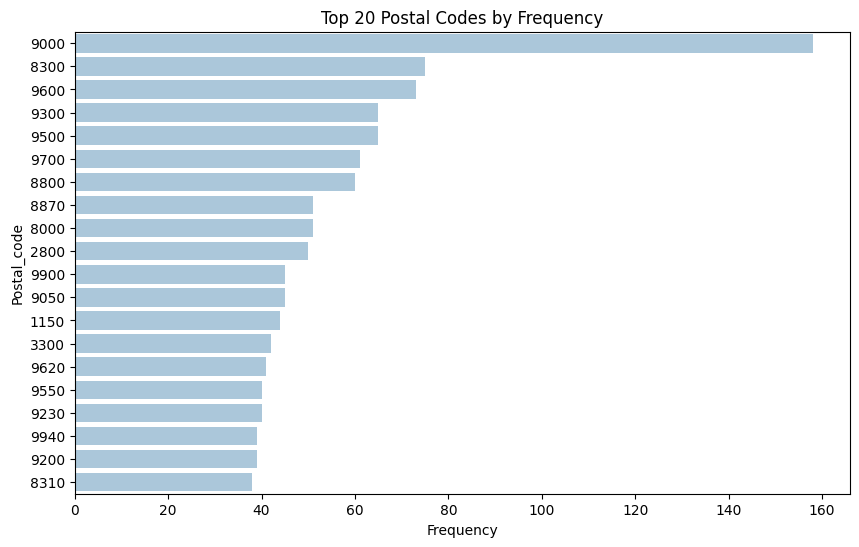

In [12]:
#Showing the top 20 

top_n = 20 

# Plotting only the top N categories
top_n_categories = frequency.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_n_categories.values, y=top_n_categories.index, color='#A3C9E2')
plt.title(f'Top {top_n} Postal Codes by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Postal code')
plt.show()

In [13]:
#Aggregate Postal code by price
Postal_aggregates = df.groupby('Postal_code').agg({'Price': ['mean', 'median']}).reset_index()


**PROVINCE**

Create a column to assign the properties to a province

In [14]:
#creating the column province

def get_province(postal_code):
    if postal_code.startswith('1'):
        return 'Brussels' if int(postal_code) < 1300 else 'Brabant_Wallon'
    elif postal_code.startswith('2'):
        return 'Antwerp'
    elif postal_code.startswith('4'):
        return 'Liège'
    elif postal_code.startswith('5'):
        return 'Namur'
    elif postal_code.startswith('6'):
        return 'Luxembourg'
    elif postal_code.startswith('7'):
        return 'Hainaut'
    elif postal_code.startswith('8'):
        return 'West Flanders'
    elif postal_code.startswith('9'):
        return 'East Flanders'
    elif postal_code.startswith('3'):
        return 'Flemish Brabant' if int(postal_code) < 3500 else 'Limburg'
    else:
        return None 

df['Province'] = df['Postal_code'].apply(get_province).copy()

#Assigning the dtypes
df['Province'] = df['Province'].astype('category')
df['Postal_code'] = df['Postal_code'].astype('str')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5662 entries, 0 to 5662
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  5662 non-null   Int64   
 1   locality_name       5662 non-null   category
 2   Postal_code         5662 non-null   object  
 3   Price               5662 non-null   Int64   
 4   Subtype             5662 non-null   category
 5   Number_of_bedrooms  5662 non-null   Int64   
 6   Living_area         5662 non-null   Int64   
 7   street              5662 non-null   category
 8   number              5645 non-null   category
 9   latitude            5660 non-null   float64 
 10  longitude           5660 non-null   float64 
 11  Open_fire           5662 non-null   Int64   
 12  Swimming_Pool       5662 non-null   Int64   
 13  hasTerrace          5662 non-null   Int64   
 14  terraceSurface      5662 non-null   Int64   
 15  gardenSurface       5662 non-null   Int64  

In [15]:
#Assess the frequency

frequency = df['Province'].value_counts()
frequency

Province
East Flanders      1686
West Flanders      1074
Antwerp             840
Brabant_Wallon      526
Liège               400
Luxembourg          317
Flemish Brabant     272
Brussels            236
Namur               112
Limburg             104
Hainaut              95
Name: count, dtype: int64

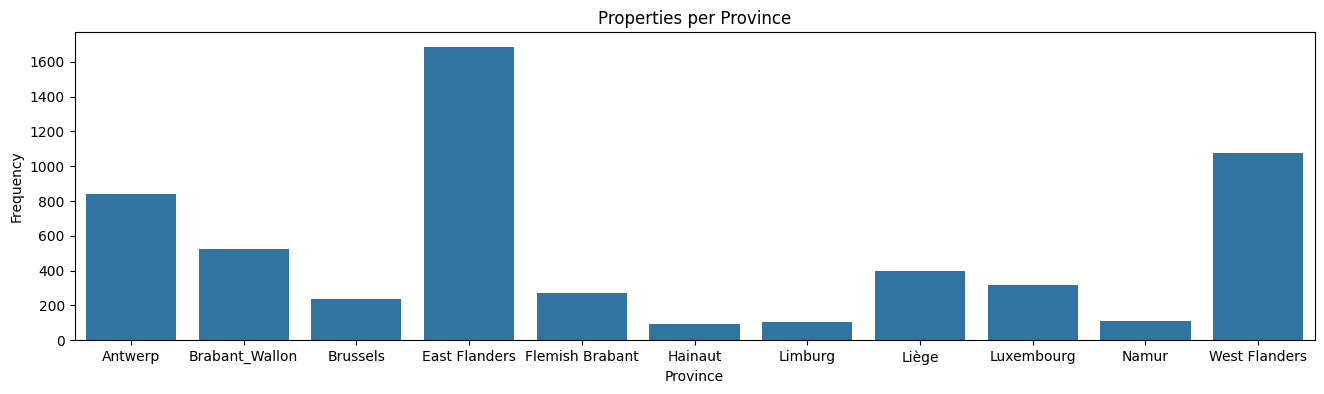

In [16]:
#Plotting the frequency

plt.figure(figsize=(16, 4))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Properties per Province')
plt.xlabel('Province')
plt.ylabel('Frequency')
plt.show()

**ASSIGNED CITY**

Create a column with all properties in the vicinity (10k) of one of the 10 biggest cities

In [17]:
#creating a column for proximity to the 10 main Belgian cities:
cities_data = {'City': ['Brussels', 'Antwerp', 'Ghent', 'Bruges', 'Liège','Namur', 'Leuven', 'Mons', 'Aalst', 'Sint-Niklaas'],
               'Latitude': [50.8503, 51.2211, 51.0543, 51.2093, 50.6050, 50.4674, 50.8798, 50.4542, 50.9403, 51.1449],
               'Longitude': [4.3517, 4.4120, 3.7174, 3.2240, 5.5797, 4.8712, 4.7033, 3.9514, 4.0364, 4.1525],
               'Radius': [10 for x in range(10)]}

cities_df = pd.DataFrame(cities_data)

cities_df.head(10)


,City,Latitude,Longitude,Radius
0,Brussels,50.8503,4.3517,10
1,Antwerp,51.2211,4.4120,10
2,Ghent,51.0543,3.7174,10
3,Bruges,51.2093,3.2240,10
4,Liège,50.6050,5.5797,10
5,Namur,50.4674,4.8712,10
6,Leuven,50.8798,4.7033,10
7,Mons,50.4542,3.9514,10
8,Aalst,50.9403,4.0364,10
9,Sint-Niklaas,51.1449,4.1525,10


In [18]:
#Make a geodataframe from the cities dataframe
cities_gdf = gpd.GeoDataFrame(cities_df,geometry=gpd.points_from_xy(cities_df.Longitude, cities_df.Latitude))

In [19]:
#Creating the buffer/radius zone (set on 10km)

cities_gdf['buffer'] = cities_gdf.geometry.buffer(cities_gdf['Radius'] / 111)
cities_gdf = cities_gdf.set_geometry('buffer')




In [20]:
print(cities_gdf)

           City  Latitude  Longitude  Radius                geometry  \
0      Brussels   50.8503     4.3517      10  POINT (4.3517 50.8503)   
1       Antwerp   51.2211     4.4120      10   POINT (4.412 51.2211)   
2         Ghent   51.0543     3.7174      10  POINT (3.7174 51.0543)   
3        Bruges   51.2093     3.2240      10   POINT (3.224 51.2093)   
4         Liège   50.6050     5.5797      10   POINT (5.5797 50.605)   
5         Namur   50.4674     4.8712      10  POINT (4.8712 50.4674)   
6        Leuven   50.8798     4.7033      10  POINT (4.7033 50.8798)   
7          Mons   50.4542     3.9514      10  POINT (3.9514 50.4542)   
8         Aalst   50.9403     4.0364      10  POINT (4.0364 50.9403)   
9  Sint-Niklaas   51.1449     4.1525      10  POINT (4.1525 51.1449)   

                                              buffer  
0  POLYGON ((4.44179 50.8503, 4.44136 50.84147, 4...  
1  POLYGON ((4.50209 51.2211, 4.50166 51.21227, 4...  
2  POLYGON ((3.80749 51.0543, 3.80706 51.0

In [21]:
cities_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   City       10 non-null     object  
 1   Latitude   10 non-null     float64 
 2   Longitude  10 non-null     float64 
 3   Radius     10 non-null     int64   
 4   geometry   10 non-null     geometry
 5   buffer     10 non-null     geometry
dtypes: float64(2), geometry(2), int64(1), object(1)
memory usage: 612.0+ bytes


In [22]:
#checking and slicing original data and creating a new dataframe house_geo
house_geo= pd.DataFrame(df[['id', 'latitude', 'longitude']]).copy()

house_geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5662 entries, 0 to 5662
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         5662 non-null   Int64  
 1   latitude   5660 non-null   float64
 2   longitude  5660 non-null   float64
dtypes: Int64(1), float64(2)
memory usage: 182.5 KB


In [23]:
#Making a geo dataframe from the dataframe
house_geo_gdf = gpd.GeoDataFrame(house_geo,geometry=gpd.points_from_xy(house_geo.longitude, house_geo.latitude))

house_geo_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5662 entries, 0 to 5662
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         5662 non-null   Int64   
 1   latitude   5660 non-null   float64 
 2   longitude  5660 non-null   float64 
 3   geometry   5662 non-null   geometry
dtypes: Int64(1), float64(2), geometry(1)
memory usage: 226.7 KB


In [24]:
joined_gdf = gpd.sjoin(house_geo_gdf, cities_gdf[['City', 'buffer']], how='left', predicate='intersects', lsuffix='_house', rsuffix='_city')


In [25]:
house_geo_gdf['Assigned_City'] = joined_gdf['City']
house_geo_gdf.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5662 entries, 0 to 5662
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             5662 non-null   Int64   
 1   latitude       5660 non-null   float64 
 2   longitude      5660 non-null   float64 
 3   geometry       5662 non-null   geometry
 4   Assigned_City  1578 non-null   object  
dtypes: Int64(1), float64(2), geometry(1), object(1)
memory usage: 270.9+ KB


In [26]:

#Slicing and checking
check_city = house_geo_gdf[house_geo_gdf['Assigned_City'].notna()]
print(check_city)

check_city.info()


            id   latitude  longitude                  geometry Assigned_City
6     20248858  50.839333   4.430145  POINT (4.43014 50.83933)      Brussels
8     20250831  51.177267   4.375369  POINT (4.37537 51.17727)       Antwerp
14    20221782  51.203166   4.462397   POINT (4.4624 51.20317)       Antwerp
15    20236558  51.212485   4.429373  POINT (4.42937 51.21249)       Antwerp
18    20251360  50.884898   4.670449   POINT (4.67045 50.8849)        Leuven
...        ...        ...        ...                       ...           ...
5642  20160020  51.221649   4.433501   POINT (4.4335 51.22165)       Antwerp
5645  20176735  51.053502   3.754882   POINT (3.75488 51.0535)         Ghent
5647  20192342  50.585528   5.517862  POINT (5.51786 50.58553)         Liège
5648  20205927  50.590662   5.499791  POINT (5.49979 50.59066)         Liège
5650  20208641  51.222408   4.440489  POINT (4.44049 51.22241)       Antwerp

[1578 rows x 5 columns]
<class 'geopandas.geodataframe.GeoDataFrame'>
Index

In [27]:
#Merge the assigned city column to the main dataframe

df = pd.merge(df, house_geo_gdf[['id', 'Assigned_City']], on='id', how='left')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5662 entries, 0 to 5661
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  5662 non-null   Int64   
 1   locality_name       5662 non-null   category
 2   Postal_code         5662 non-null   object  
 3   Price               5662 non-null   Int64   
 4   Subtype             5662 non-null   category
 5   Number_of_bedrooms  5662 non-null   Int64   
 6   Living_area         5662 non-null   Int64   
 7   street              5662 non-null   category
 8   number              5645 non-null   category
 9   latitude            5660 non-null   float64 
 10  longitude           5660 non-null   float64 
 11  Open_fire           5662 non-null   Int64   
 12  Swimming_Pool       5662 non-null   Int64   
 13  hasTerrace          5662 non-null   Int64   
 14  terraceSurface      5662 non-null   Int64   
 15  gardenSurface       5662 non-null   In

In [28]:
#Make a boolean column of Assigned_City and transform to categorical

df['Has_Assigned_City'] = df['Assigned_City'] != None
df['Has_Assigned_City'] = df['Has_Assigned_City'].astype('category')

**GEO-MAPPING**

In [29]:
df.head(10)

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,...,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,...,4,To renovate,0,F,767.0,2552.000000,415.906128,East Flanders,NaN,True
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,...,2,Good,0,D,1050.0,1796.401198,285.713333,East Flanders,NaN,True
2,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,...,2,To renovate,0,E,120.0,1785.714286,2291.666667,Antwerp,NaN,True
3,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,...,3,To renovate,0,F,309.0,1715.116279,954.692557,Brabant_Wallon,NaN,True
4,20250985,Oetingen,1755,560000,House,4,350,Blijkheerstraat,70,50.775412,...,3,Good,0,C,NaN,1600.000000,NaN,Brabant_Wallon,NaN,True
5,20251715,Dilbeek,1700,715000,House,3,280,Herdebeekstraat 94-94A,0,50.840610,...,3,As new,0,C,374.0,2553.571429,1911.764706,Brabant_Wallon,NaN,True
6,20248858,Woluwe-Saint-Lambert,1200,790000,House,5,349,Rue De La Cambre - Terkamerenstraat,296,50.839333,...,2,Good,0,F,160.0,2263.610315,4937.500000,Brussels,Brussels,True
7,20245694,Herzele,9550,198800,House,3,125,Stationsstraat,173,50.894568,...,2,To renovate,0,F,250.0,1590.400000,795.200000,East Flanders,NaN,True
8,20250831,Wilrijk,2610,299000,House,3,132,Egied Segerslaan,42,51.177267,...,2,As new,0,D,145.0,2265.151515,2062.068966,Antwerp,Antwerp,True
9,20250541,Brecht,2960,469000,House,3,153,Cambeenbos Laan D,3,51.310017,...,4,To renovate,0,D,NaN,3065.359477,NaN,Antwerp,NaN,True


In [30]:
#Getting a map from folium with the coordinates of the mean lat and long of the dataframe

m = folium.Map(location = [df.latitude.mean(), df.longitude.mean()], zoom_start=7, control_scale= True)

m


In [31]:
map_values = df[['latitude', 'longitude']].dropna()

map_data = map_values.values.tolist()

In [32]:
for coord in map_data:
    folium.Marker(location=coord).add_to(m)
    
# m.save('map.html')
# webbrowser.open(r'C:\Users\Rik\Desktop\immo-eliza-team6-analysis\analysis\map.html')

**SUBTYPE**

In [33]:
#Check the missing values
df['Subtype'].isnull().mean()*100

np.float64(0.0)

In [34]:
df['Subtype'].isnull().sum()

np.int64(0)

In [35]:
frequency = df['Subtype'].value_counts()
frequency

Subtype
House    5662
Name: count, dtype: int64

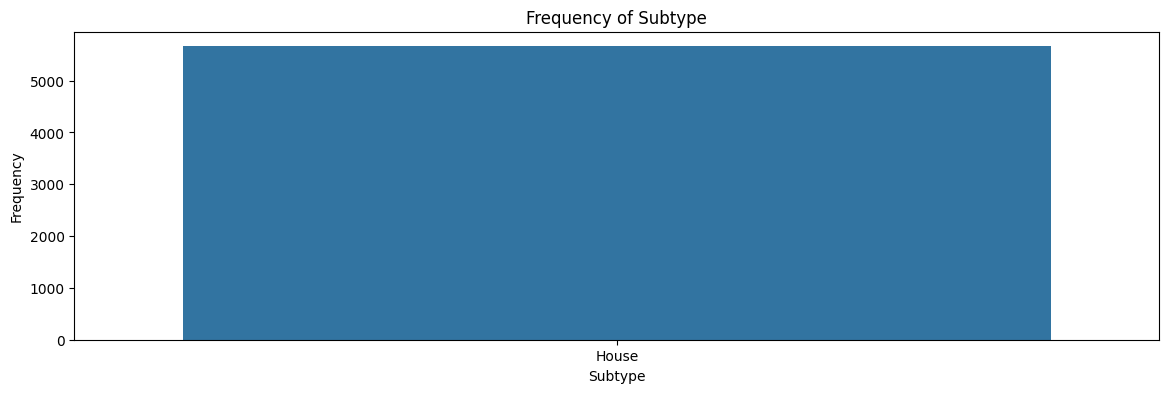

In [36]:
#Detecting Outliers
frequency = df['Subtype'].value_counts()

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequency of Subtype')
plt.xlabel('Subtype')
plt.ylabel('Frequency')
plt.show()


In [37]:
#Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['subtype', 'count']

print(frequency_df)

  subtype  count
0   House   5662


In [38]:
#Determing the rare values (threshold 5%)
threshold = 0.05 * len(df)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)

Rare Values: Series([], Name: count, dtype: int64)


In [39]:
#Here we will use One-Hot Encoding (pd.get_dummies) because this is a nominal (unordered) column and the number of categories is small.
df_one_hot_subtype = pd.get_dummies(df.copy(), columns=['Subtype'], prefix='Subtype', drop_first=True)



In [40]:
df_one_hot_subtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5662 entries, 0 to 5661
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  5662 non-null   Int64   
 1   locality_name       5662 non-null   category
 2   Postal_code         5662 non-null   object  
 3   Price               5662 non-null   Int64   
 4   Number_of_bedrooms  5662 non-null   Int64   
 5   Living_area         5662 non-null   Int64   
 6   street              5662 non-null   category
 7   number              5645 non-null   category
 8   latitude            5660 non-null   float64 
 9   longitude           5660 non-null   float64 
 10  Open_fire           5662 non-null   Int64   
 11  Swimming_Pool       5662 non-null   Int64   
 12  hasTerrace          5662 non-null   Int64   
 13  terraceSurface      5662 non-null   Int64   
 14  gardenSurface       5662 non-null   Int64   
 15  Kitchen_type        3512 non-null   ca

**KITCHEN_TYPE**


In [41]:
#Checking the missing values
df['Kitchen_type'].isnull().mean()*100

np.float64(37.97244789826916)

In [42]:
df['Kitchen_type'].isnull().sum()
df['Kitchen_type'].head(30)

0                    NaN
1              Installed
2          Semi equipped
3                    NaN
4              Installed
5                    NaN
6     Usa hyper equipped
7          Semi equipped
8                    NaN
9          Semi equipped
10             Installed
11             Installed
12             Installed
13        Hyper equipped
14         Semi equipped
15        Hyper equipped
16             Installed
17             Installed
18             Installed
19             Installed
20                   NaN
21             Installed
22         Semi equipped
23             Installed
24         Usa installed
25        Hyper equipped
26         Semi equipped
27                   NaN
28             Installed
29                   NaN
Name: Kitchen_type, dtype: category
Categories (8, object): ['Hyper equipped', 'Installed', 'Not installed', 'Semi equipped', 'Usa hyper equipped', 'Usa installed', 'Usa semi equipped', 'Usa uninstalled']

In [43]:
#Dealing with the high number of missing values
#df['Kitchen_type'] = df['Kitchen_type'].apply(lambda x: 'Missing' if pd.isna(x) else x)

In [44]:
frequency = df['Kitchen_type'].value_counts()
frequency

Kitchen_type
Installed             1842
Hyper equipped         827
Semi equipped          594
Not installed          192
Usa installed           29
Usa hyper equipped      23
Usa uninstalled          4
Usa semi equipped        1
Name: count, dtype: int64

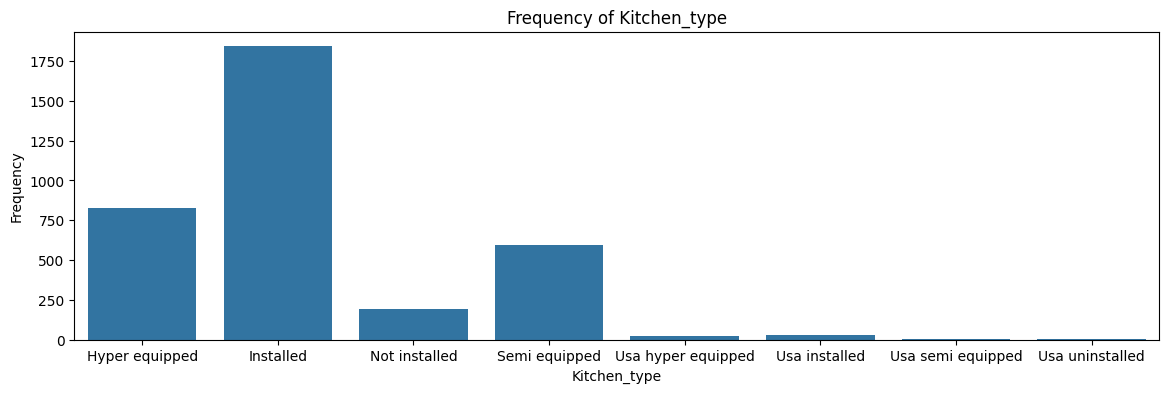

In [45]:
#Detecting Outliers
frequency = df['Kitchen_type'].value_counts()

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequency of Kitchen_type')
plt.xlabel('Kitchen_type')
plt.ylabel('Frequency')
plt.show()

In [46]:
#Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['Kitchen_type', 'count']

print(frequency_df)

         Kitchen_type  count
0           Installed   1842
1      Hyper equipped    827
2       Semi equipped    594
3       Not installed    192
4       Usa installed     29
5  Usa hyper equipped     23
6     Usa uninstalled      4
7   Usa semi equipped      1


In [47]:
#Determing the rare values (threshold 5%)
threshold = 0.05 * len(df)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)

Rare Values: Kitchen_type
Not installed         192
Usa installed          29
Usa hyper equipped     23
Usa uninstalled         4
Usa semi equipped       1
Name: count, dtype: int64


**State_of_building**

In [48]:
#Checking the missing values
df['State_of_building'].isnull().mean()*100

np.float64(9.41363475803603)

In [49]:
df['State_of_building'].isnull().sum()

np.int64(533)

In [50]:
frequency = df['State_of_building'].value_counts()
frequency

State_of_building
Good              2244
As new            1038
To renovate        926
To be done up      581
Just renovated     304
To restore          36
Name: count, dtype: int64

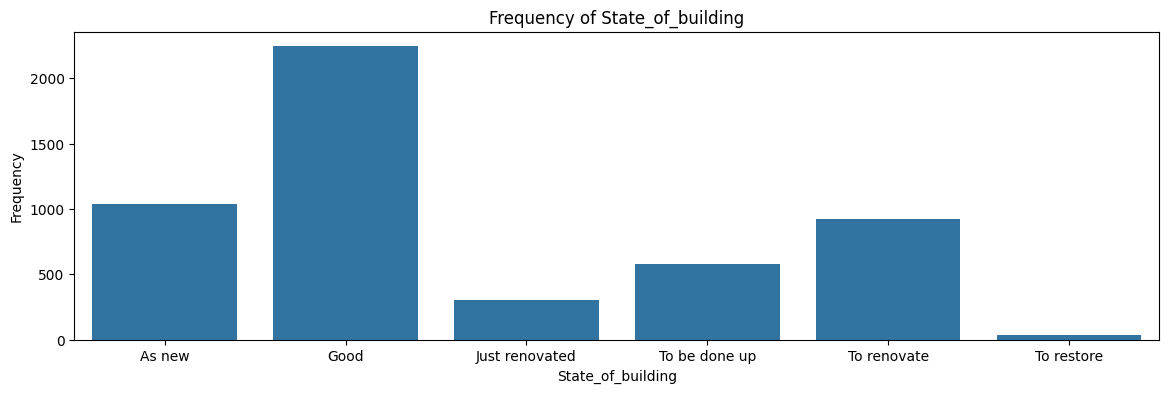

In [51]:
#Detecting Outliers
frequency = df['State_of_building'].value_counts()

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('Frequency of State_of_building')
plt.xlabel('State_of_building')
plt.ylabel('Frequency')
plt.show()

In [52]:
#Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['State_of_building', 'count']

print(frequency_df)

  State_of_building  count
0              Good   2244
1            As new   1038
2       To renovate    926
3     To be done up    581
4    Just renovated    304
5        To restore     36


In [53]:
#Dealing with missing values (Imputation)

df['State_of_building'] = df['State_of_building'].fillna(df['State_of_building'].mode()[0])
frequency = df['State_of_building'].value_counts()
frequency

#Missing is also a possibility here???

#df['State_of_building'] = df['State_of_building'].fillna('Missing')

State_of_building
Good              2777
As new            1038
To renovate        926
To be done up      581
Just renovated     304
To restore          36
Name: count, dtype: int64

In [54]:
#Determing the rare values (threshold 5%)
threshold = 0.05 * len(df)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)

Rare Values: State_of_building
To restore    36
Name: count, dtype: int64


In [55]:
#Assign the rare value to another value
category_map = {'To restore': 'To renovate'}
df['State_of_building'] = df['State_of_building'].map(category_map).fillna(df['State_of_building'])

frequency = df['State_of_building'].value_counts()
frequency

State_of_building
Good              2777
As new            1038
To renovate        962
To be done up      581
Just renovated     304
Name: count, dtype: int64

**EPC**

In [56]:
#Checking the missing values
df['epc'].isnull().mean()*100

np.float64(4.503708936771459)

In [57]:
#Checking the missing values
df['epc'].isnull().sum()

np.int64(255)

In [58]:
frequency = df['epc'].value_counts()
frequency

epc
F      1063
C      1051
D      1005
B       893
E       625
A       486
G       214
A+       51
A++      19
Name: count, dtype: int64

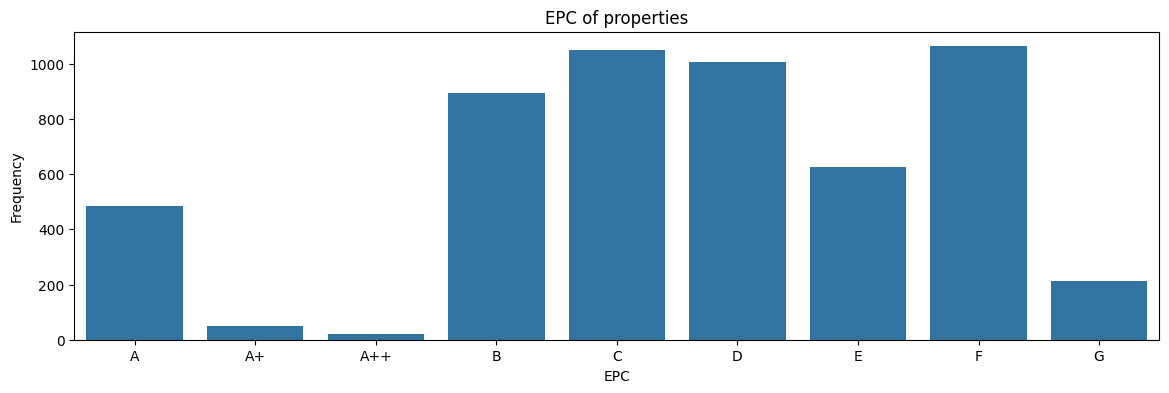

In [59]:
#Detecting Outliers
frequency = df['epc'].value_counts()

plt.figure(figsize=(14, 4))
sns.barplot(x=frequency.index, y=frequency.values)
plt.title('EPC of properties')
plt.xlabel('EPC')
plt.ylabel('Frequency')
plt.show()

In [60]:
#Creating a seperate frequency dataframe

frequency_df = frequency.reset_index()
frequency_df.columns = ['epc', 'count']

print(frequency_df)

   epc  count
0    F   1063
1    C   1051
2    D   1005
3    B    893
4    E    625
5    A    486
6    G    214
7   A+     51
8  A++     19


In [61]:
#Dealing with missing values (Imputation)

df['epc'] = df['epc'].fillna(df['epc'].mode()[0])
frequency = df['epc'].value_counts()
frequency

#Missing is also a possibility here???

#df['epc'] = df['epc'].fillna('Missing')

epc
F      1318
C      1051
D      1005
B       893
E       625
A       486
G       214
A+       51
A++      19
Name: count, dtype: int64

In [62]:
#Determing the rare values (threshold 5%)
threshold = 0.05 * len(df)  
rare_categories = frequency[frequency < threshold]

print("Rare Values:", rare_categories)


Rare Values: epc
G      214
A+      51
A++     19
Name: count, dtype: int64


In [63]:
#Assign the rare value to another value (EPC G only exist in Brussels and Wallonia)
category_map = {'A+': 'A', 'A++': 'A', 'G':'F'}
df['epc'] = df['epc'].map(category_map).fillna(df['epc'])

frequency = df['epc'].value_counts()
frequency

epc
F    1532
C    1051
D    1005
B     893
E     625
A     556
Name: count, dtype: int64

**Correlation**

In [3]:
file_path =  r'C:\Users\Rik\Desktop\immo-eliza-team6-analysis\data\clean\after_step_4_correlation.csv'

df = pd.read_csv(file_path, sep = ',')

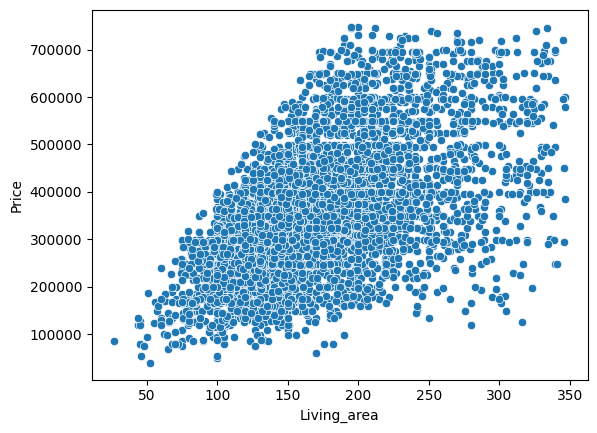

In [4]:
sns.scatterplot(x='Living_area', y='Price', data=df)
plt.show()

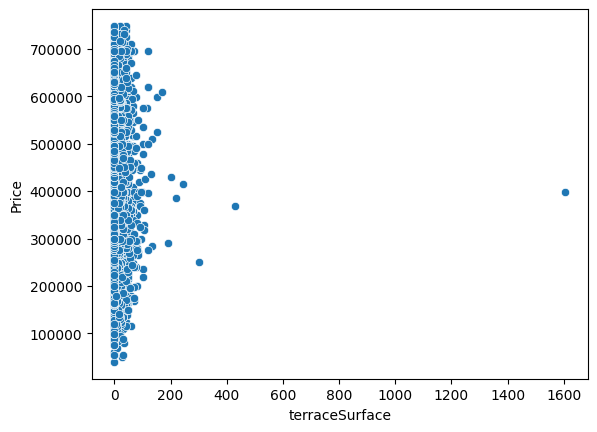

In [5]:
sns.scatterplot(x='terraceSurface', y='Price', data=df)
plt.show()